# CLUSTERING ASSIGNMENT

## READING AND UNDERSTANDING DATA

In [1]:
#For getting rid of unecessary warnings
import warnings
warnings.simplefilter("ignore")

In [2]:
#Required libraries are imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#For displaying rows and columns upto 50
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)

#For scaling, K-means and silhoutte score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#For hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
#Loading the data
country_data = pd.read_csv("Country-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Knowing the information of "country_data" dataset
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
#Shape of dataset
country_data.shape

(167, 10)

In [6]:
#checking duplicates
country_data.duplicated(subset=["country"]).sum()

0

In [7]:
#Numerical description of "country_data"
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
#Checking null values
round(100*(country_data.isnull().sum()/len(country_data)),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [9]:
#converting exports,health and import to absolute values
country_data['exports'] = (country_data['exports']*country_data['gdpp'])/100
country_data['health'] = (country_data['health']*country_data['gdpp'])/100
country_data['imports'] = (country_data['imports']*country_data['gdpp'])/100
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# DATA VISUALIZATION

## UNIVARIATE ANALYSIS

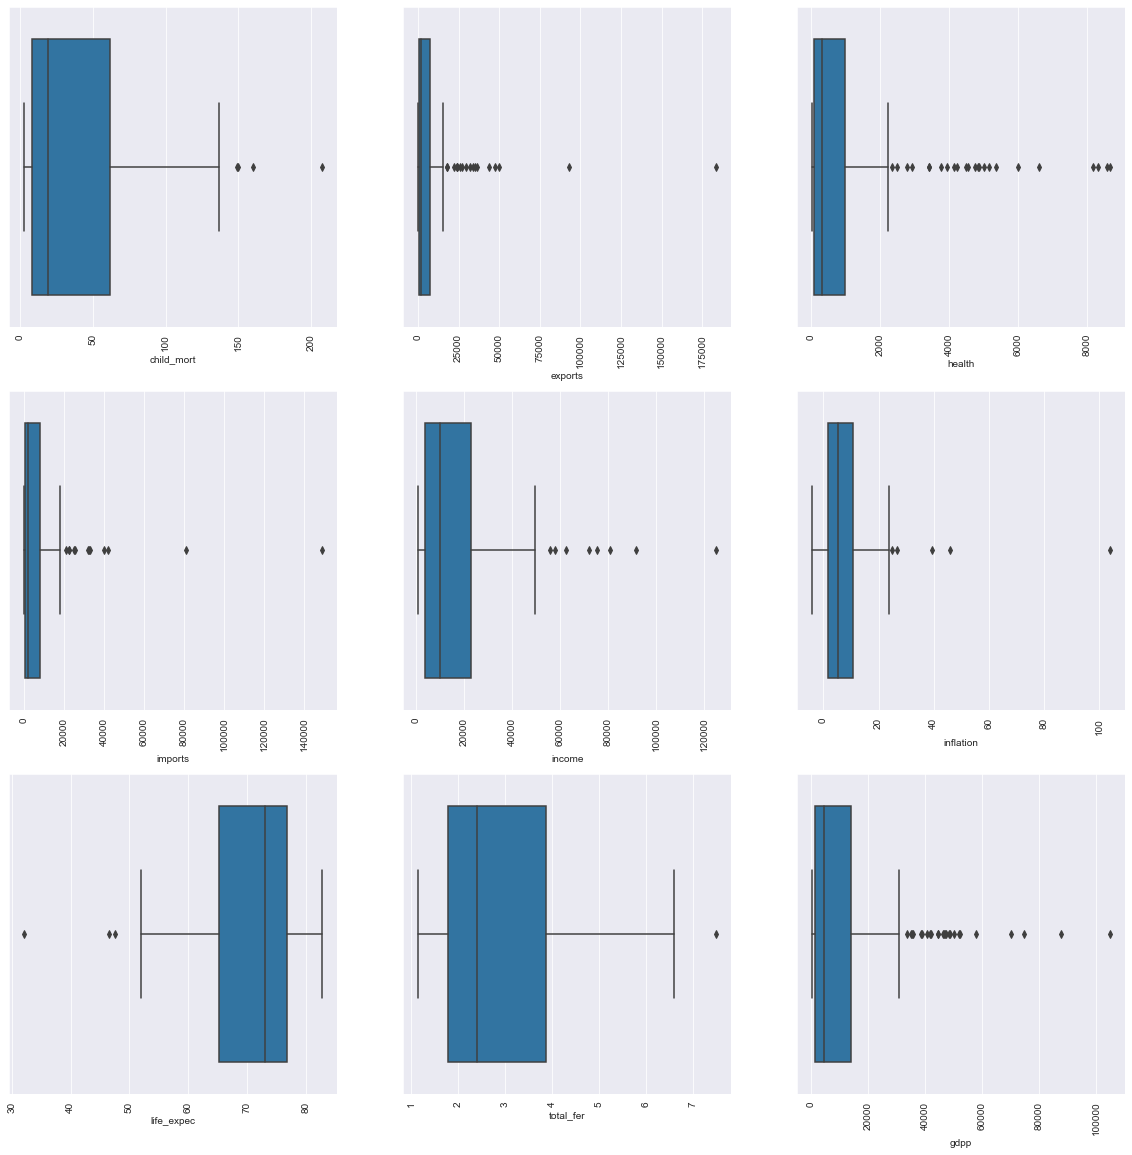

In [10]:
#checking outliers using boxplot

sns.set_style("darkgrid")

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='child_mort',data=country_data)
plt.xticks(rotation=90)

plt.subplot(3,3,2)
sns.boxplot(x='exports',data=country_data)
plt.xticks(rotation=90)

plt.subplot(3,3,3)
sns.boxplot(x='health',data=country_data)
plt.xticks(rotation=90)

plt.subplot(3,3,4)
sns.boxplot(x='imports',data=country_data,)
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.boxplot(x='income',data=country_data)
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.boxplot(x='inflation',data=country_data)
plt.xticks(rotation=90)

plt.subplot(3,3,7)
sns.boxplot(x='life_expec',data=country_data,)
plt.xticks(rotation=90)

plt.subplot(3,3,8)
sns.boxplot(x='total_fer',data=country_data)
plt.xticks(rotation=90)

plt.subplot(3,3,9)
sns.boxplot(x='gdpp',data=country_data)
plt.xticks(rotation=90)

plt.show()

**Inference** : Visibility of Outliers in every columns.

## BIVARIATE ANALYSIS

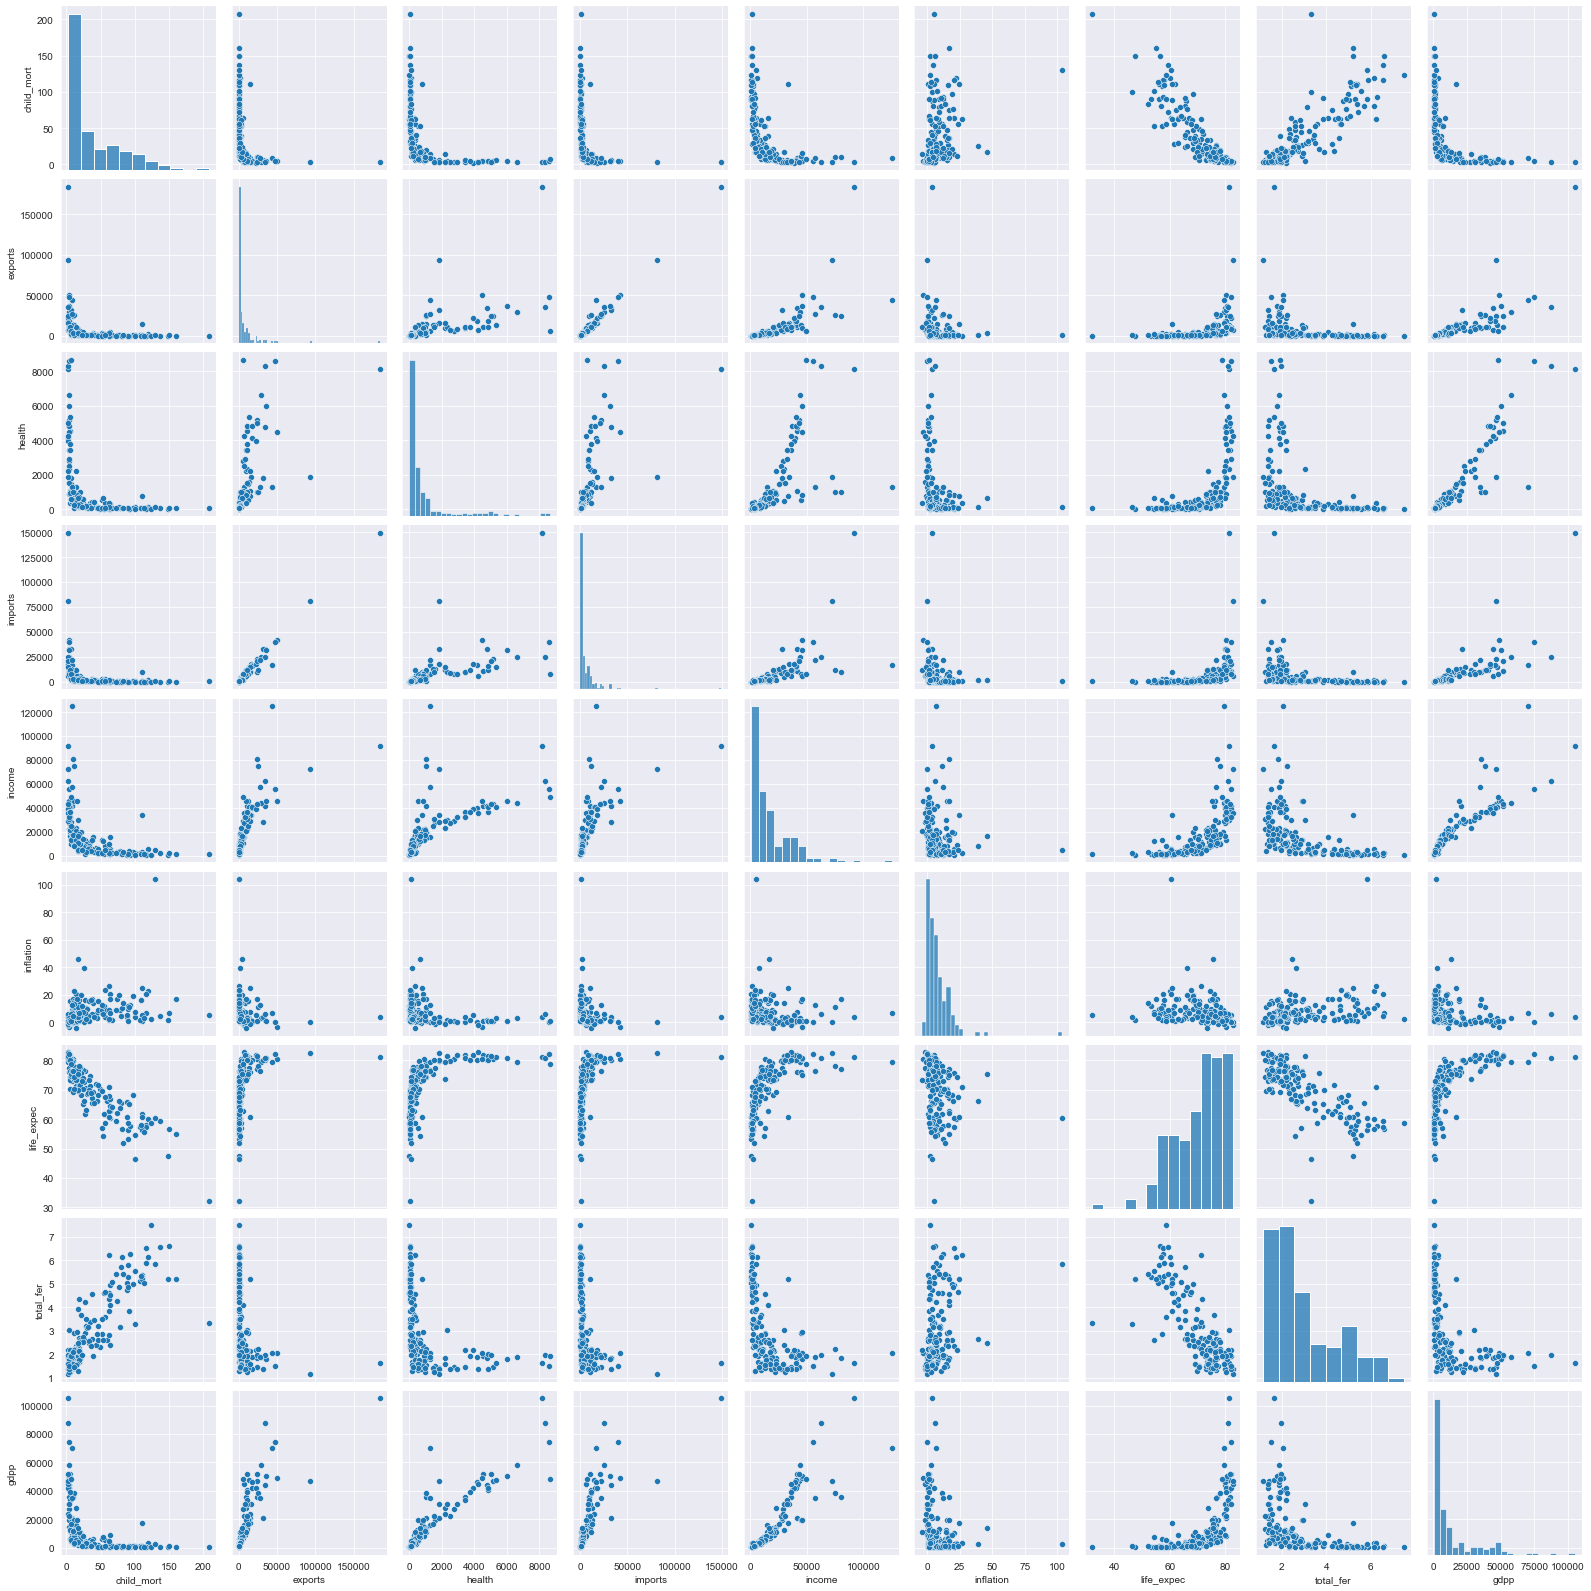

In [11]:
#pairplot
sns.pairplot(country_data)
plt.show()

## CORRELATION BETWEEN VARIABLES

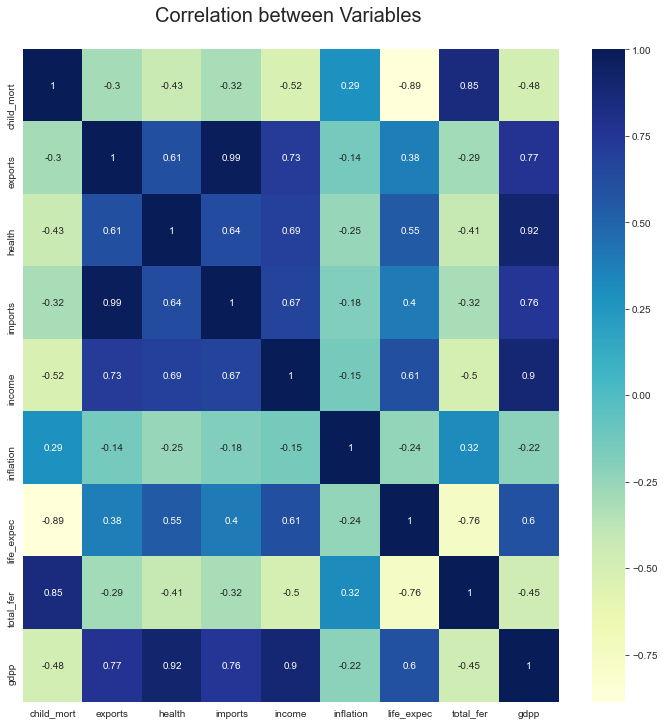

In [12]:
#Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(country_data.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation between Variables \n",fontsize=20)
plt.show()

**Inference** : High correlation is observed in every variables (positive and negative values) which may be a problem for upcoming steps and analysis.

# DATA PREPARATION

In [13]:
#copying the original dataset and storing it in new one for outlier treatment and data preparation.
country_data_df = country_data.copy()
country_data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## OUTLIERS TREATMENT 

In [14]:
def capping(df, col, flag):
    q1= df[col].quantile(0.05)
    q3= df[col].quantile(0.95)
    iqr= q3-q1
    
    lower_cap= q1-1.5*iqr
    upper_cap= q3+1.5*iqr
    
    if flag == 1:
        df.loc[(df[col] > upper_cap), col] = upper_cap
    else:
        df.loc[(df[col] < lower_cap), col] = lower_cap

    return df

country_data_df = capping(country_data_df, 'child_mort',0)
country_data_df = capping(country_data_df, 'inflation',0)
country_data_df = capping(country_data_df, 'total_fer',0)
country_data_df = capping(country_data_df, 'exports',1)
country_data_df = capping(country_data_df, 'health',1)
country_data_df = capping(country_data_df, 'imports',1)
country_data_df = capping(country_data_df, 'income',1)
country_data_df = capping(country_data_df, 'life_expec',1)
country_data_df = capping(country_data_df, 'gdpp',1)

# CLUSTERING

## HOPKINS STATISTICS

In [15]:
#Required libraries for Hopkins statistics imported. It's been used for checking the cluster tendency of the dataset.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [16]:
#Hopkins measure
hopkins(country_data_df.drop('country', axis = 1))

0.9158989205227269

#### Hopkins statistics value seems to be a good one and good to perform clustering.

## SCALING THE DATA

In [17]:
#creating new dataframe to scale data and dropping column country
df_country = country_data_df.drop("country", axis=1)
scaler = StandardScaler()
country_data_scale = scaler.fit_transform(df_country)
country_data_scale.shape

(167, 9)

In [18]:
country_data_scale = pd.DataFrame(country_data_scale)
country_data_scale.columns = ['child_mort', 'exports', 'health','imports', 'income', 'inflation','life_expec', 'total_fer', 'gdpp']
country_data_scale.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.541453,-0.565040,-0.584905,-0.814829,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.452650,-0.439218,-0.405924,-0.377399,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.406416,-0.484826,-0.466354,-0.221249,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.366772,-0.532363,-0.454632,-0.589279,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.093671,-0.178771,0.128932,0.104721,-0.601749,0.704258,-0.541946,-0.041817


# K-MEANS CLUSTERING

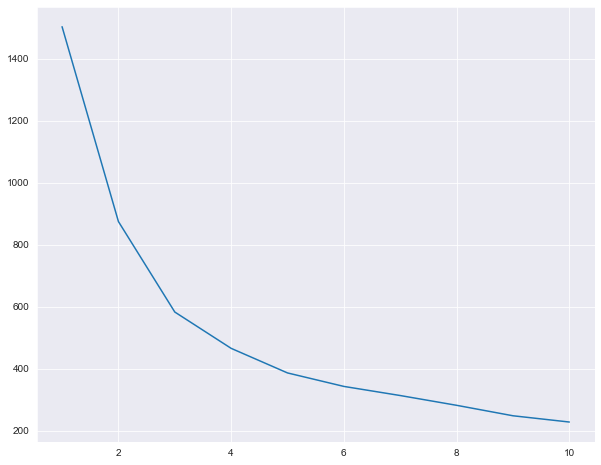

In [19]:
#Elbow Curve method
ssd = []
for k in range(1,11):
    model = KMeans(n_clusters = k, max_iter = 50).fit(country_data_scale)
    ssd.append([k, model.inertia_])
plt.figure(figsize=(10,8))
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])
plt.show()

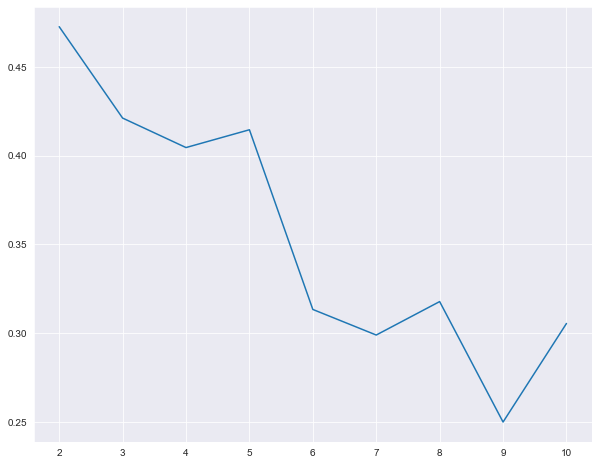

[[2, 0.4725639175564821],
 [3, 0.4211038538424345],
 [4, 0.40449336757325627],
 [5, 0.41451520837955064],
 [6, 0.31332393375169804],
 [7, 0.2989140450334457],
 [8, 0.31775234427928656],
 [9, 0.24991977530009238],
 [10, 0.30542408364679585]]

In [20]:
# silhouette score analysis
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(country_data_scale)
    ss.append([k, silhouette_score(country_data_scale, kmeans.labels_)])
    
plt.figure(figsize=(10,8))    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])
plt.show()
ss

#### From the Elbow curve and silhoutte score, we will choose k values . Optimal number for K seems to be 3.

In [21]:
# K means clustering using K=3
kmeans = KMeans(n_clusters = 3, max_iter = 50,random_state=50)
kmeans.fit(country_data_scale)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [22]:
# Centroids
kmeans.cluster_centers_

array([[ 1.32661038, -0.4743342 , -0.52444743, -0.52535578, -0.69456952,
         0.39181237, -1.27627565,  1.3543418 , -0.60496339],
       [-0.44998219, -0.24855676, -0.26924604, -0.22361347, -0.15450629,
        -0.0746178 ,  0.33795561, -0.47857149, -0.25924001],
       [-0.82514582,  1.69019496,  1.84978193,  1.69590803,  1.76125613,
        -0.44230208,  1.11738206, -0.77703072,  1.9588268 ]])

In [23]:
#checking kmeans.labels_ array
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [24]:
#copying the previous data and creating new one for further steps
count_0=country_data_df.copy()
count_0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [25]:
#adding cluster id to the data count_0
count_0['cluster_id'] = kmeans.labels_
count_0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


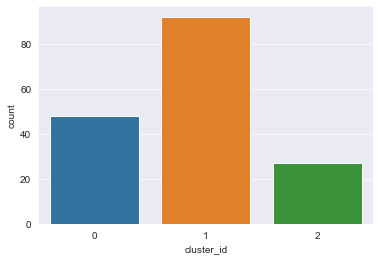

In [26]:
#Plotting Cluster ID
sns.countplot(count_0.cluster_id)
plt.show()

In [27]:
#count of cluster_id
count_0['cluster_id'].value_counts()

1    92
0    48
2    27
Name: cluster_id, dtype: int64

# K-MEANS CLUSTER VISUALIZATION

### USING SCATTER PLOT

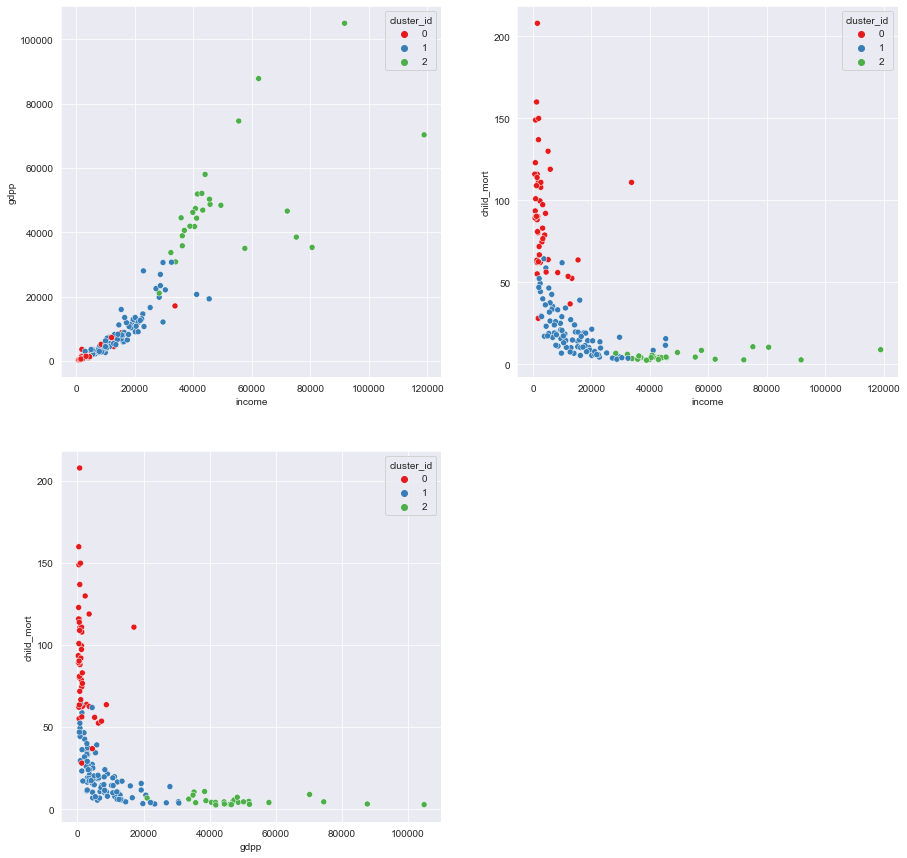

In [28]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = count_0,palette="Set1")
plt.subplot(2,2,2)
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_id', legend = 'full', data = count_0,palette="Set1")
plt.subplot(2,2,3)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = count_0,palette="Set1")
plt.show()

**Inference** :In this scatter plot,
- GDPP and income is low in 0, while it's high in cluster_id =2.
- There's a rise in child mortality rate and income  for cluste_id =0. 1 and 2 seems to be in decreasing form.Same scenario is with gdpp also.


# K-MEANS CLUSTER PROFILING

### USING BOX PLOT

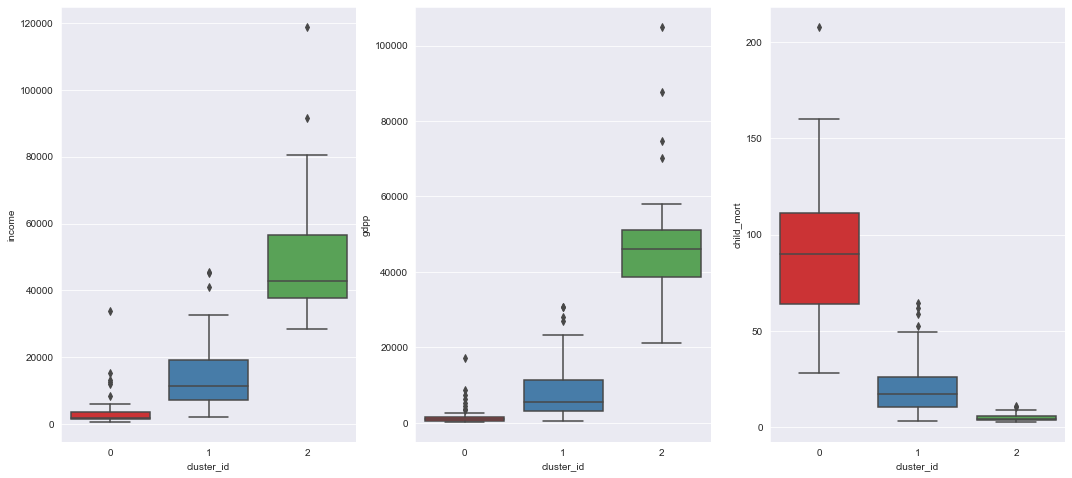

In [29]:
plt.figure(figsize=(18,8))

plt.subplot(1,3,1)
sns.boxplot(x = 'cluster_id', y = 'income', data = count_0 ,palette="Set1")

plt.subplot(1,3,2)
sns.boxplot(x = 'cluster_id', y = 'gdpp',data = count_0 ,palette="Set1")

plt.subplot(1,3,3)
sns.boxplot(x = 'cluster_id', y = 'child_mort', data = count_0 ,palette="Set1")

plt.show()

**Inference** : From the above boxplot, 
- cluster_id = 0 has low income,low gdpp and high child mortality.
- In cluster_id = 2, it seems to have high income and gdpp with low child mortality rate.

# HIERARCHICAL CLUSTERING

In [30]:
country_data_scale.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.541453,-0.565040,-0.584905,-0.814829,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.452650,-0.439218,-0.405924,-0.377399,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.406416,-0.484826,-0.466354,-0.221249,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.366772,-0.532363,-0.454632,-0.589279,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.093671,-0.178771,0.128932,0.104721,-0.601749,0.704258,-0.541946,-0.041817


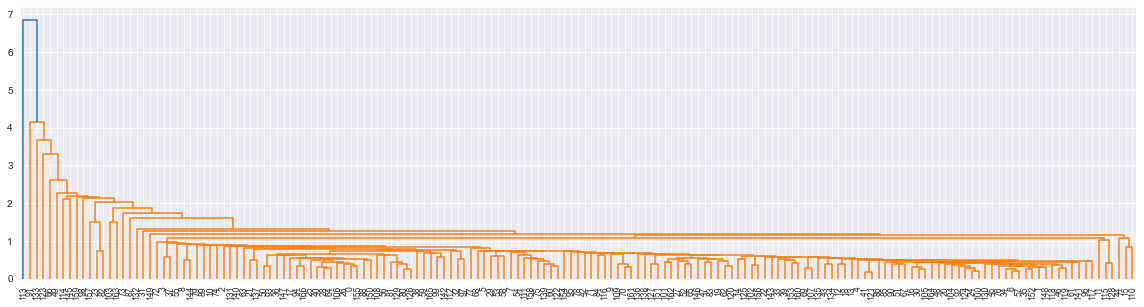

In [31]:
#single linkage
plt.figure(figsize=(20,5))
mergings = linkage(country_data_scale, method="single", metric='euclidean')
dendrogram(mergings)
plt.xticks(fontsize=8.5)
plt.show()

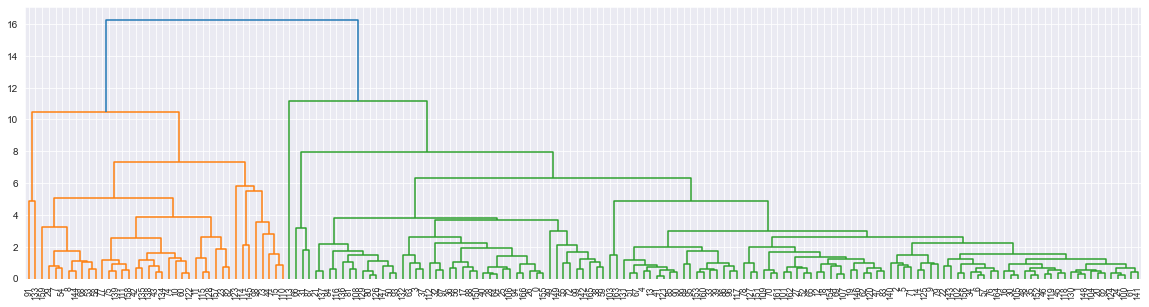

In [32]:
#complete linkage
plt.figure(figsize=(20,5))
mergings_c = linkage(country_data_scale, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.xticks(fontsize=8.5)
plt.show()

**Inference** : Complete Linkage model will be a good approach for knowing the no. of clusters needed after the horizontal line  cuts the dendogram. About the single linkage, it's tough to know the whole hierarchy.

In [33]:
# 2 clusters as we can see from dendogram
cluster_labels = cut_tree(mergings_c, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [34]:
# cluster labels to the dataset
count_0['cluster_label']=cluster_labels

In [35]:
#count of cluster_label
count_0.cluster_label.value_counts()

0    128
1     39
Name: cluster_label, dtype: int64

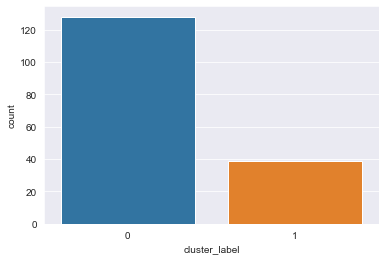

In [36]:
#countplot of cluster label
sns.countplot(count_0.cluster_label)
plt.show()

# VISUALIZATION OF HIERARCHICAL CLUSTERS

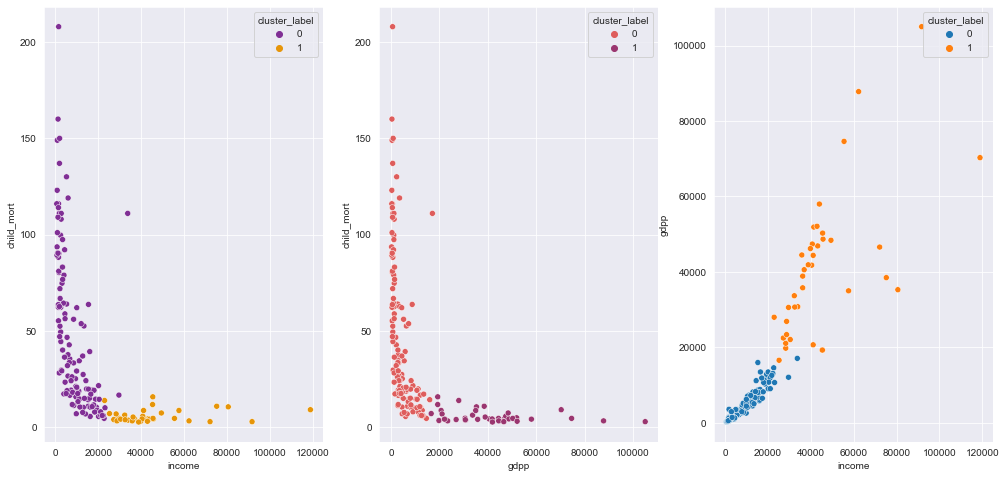

In [37]:
#Scatter plot
plt.figure(figsize=(17,8))
plt.subplot(1,3,1)
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_label', legend = 'full', data = count_0, palette='CMRmap')
plt.subplot(1,3,2)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_label', legend = 'full', data = count_0, palette='flare')
plt.subplot(1,3,3)
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_label', legend = 'full', data = count_0)
plt.show()

**Inference** : In this scatter plot ,
- There seems to be an increment in child mortality rate when its compared with income and gdpp which is low.
- Rise in gdpp and income for cluster_label as 1.

# CLUSTER PROFILING

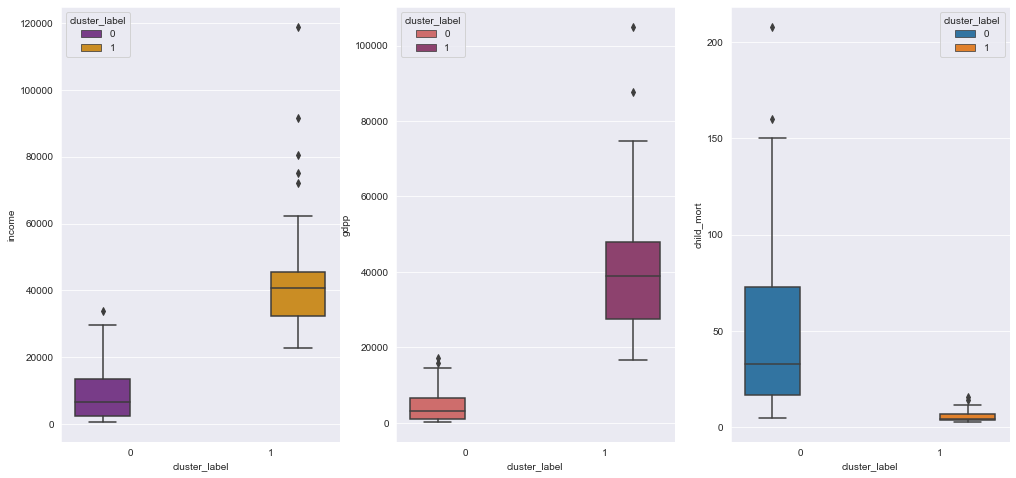

In [38]:
#boxplot
plt.figure(figsize=(17,8))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_label',y='income',data=count_0,hue="cluster_label",palette="CMRmap")
plt.subplot(1,3,2)
sns.boxplot(x='cluster_label',y='gdpp',data=count_0,hue="cluster_label",palette="flare")
plt.subplot(1,3,3)
sns.boxplot(x='cluster_label',y='child_mort',data=count_0,hue="cluster_label")

plt.show()

**Inference** : As per the above boxplot, 
- cluster label= 0 has low income,low gdpp and high child_mort.
- In cluster label=1, gdpp and income seems to be high. Child mortality is low.

# OBSERVATIONS OF COUNTRY THAT BELONG TO CLUSTER LABEL AS 0

In [39]:
count_0[count_0['cluster_label']==0]['country']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 128, dtype: object

In [40]:
#showing top 10 countries that need aid
aid_needed = count_0[count_0.cluster_label==0].sort_values(by=['gdpp','child_mort','income'],ascending=[True,False,True])[['country','child_mort','gdpp','income']]
aid_needed.head(10)

,country,child_mort,gdpp,income
26,Burundi,93.6,231.0,764.0
88,Liberia,89.3,327.0,700.0
37,"Congo, Dem. Rep.",116.0,334.0,609.0
112,Niger,123.0,348.0,814.0
132,Sierra Leone,160.0,399.0,1220.0
93,Madagascar,62.2,413.0,1390.0
106,Mozambique,101.0,419.0,918.0
31,Central African Republic,149.0,446.0,888.0
94,Malawi,90.5,459.0,1030.0
50,Eritrea,55.2,482.0,1420.0


## TOP 5 COUNTRIES THAT ARE IN DIREST NEED OF AID

In [41]:
aid_needed['country'].reset_index().drop('index',axis=1).head(5)

,country
0,Burundi
1,Liberia
2,"Congo, Dem. Rep."
3,Niger
4,Sierra Leone


### The top-5 countries that are in need of aid from HELP are :

- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone